# Hate_speech-Pre-processing excercise
Special thanks to VidyaAnalytica tutorials that helped me in this excercise.

# Problem Statement
To preprocess dataset for future use of supervised and unsupervised learning

# 1)- Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd
import numpy as np

# 2)-Loading Dataset

In [4]:
train = pd.read_csv('train_E6oV3lV.csv')

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train.shape

(31962, 3)

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
#Let’s check out a few non racist/sexist tweets.

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
#check out a few racist/sexist tweets.

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


# 3)-Basic feature extraction using text data
- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

### 3.1)- Number of words
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function

In [10]:
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
train[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


### 3.2)-Number of characters
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet(space, special character included). This is done by calculating the length of the tweet.

In [11]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


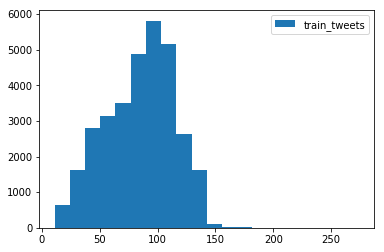

In [12]:
length_train = train['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.legend() 
plt.show()

### 3.3)- Average Word Length
Take the sum of the length of all the words and divide it by the total length of the tweet

In [13]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


### 3.4)-Number of stopwords
 Some examples are "the, is, at, which, and, on" 

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


### 3.5)-Number of special characters
- One easy example is number of hashtags
- Use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [15]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [16]:
train['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

### 3.6)-Number of numerics/digits

In [17]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


### 3.7)-Number of Uppercase words

In [18]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


# 4)-Basic Text Pre-processing of text data
- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent words removal
- Rare words removal
- Spelling correction
- Tokenization
- Stemming
- Lemmatization

### 4.1)-Lower case
First pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Father’ and ‘father’ will be taken as different words.

In [19]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

### 4.2)-Removing Punctuation
removing em will help us reduce the size 

In [20]:
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

In [21]:
train['tweet'][1]

'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked'

In [22]:
train['tweet'][0]

'user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run'

In [23]:
#train['tweet'] = train['tweet'].str.replace('[^a-zA-Z]','')
#train['tweet'].head()

In [24]:
import string
import re

def clean_more(text):
    ''' remove text in square brackets, remove punctuation and remove words containing numbers if anyleft by now.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean_pun_2 = lambda x: clean_more(x)

In [25]:
train['tweet'] = train.tweet.apply(clean_pun_2)
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

### 4.3)-Removal of Stop Words

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [27]:
train['tweet'][0]

'user father dysfunctional selfish drags kids dysfunction run'

In [28]:
train['tweet'][1]

'user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked'

### 4.4)-Common word removal

In [29]:
# let’s check the 10 most frequently occurring words in our text data
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

user     17473
love      2647
ð         2522
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

 remove these words as their presence will not of any use in classification of our text data.

In [30]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [31]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

life        1086
like        1042
today        991
new          983
positive     928
thankful     919
get          917
people       852
good         840
bihday       825
dtype: int64

We can clearly see that we have got a better list of most frequent words now than before.

In [32]:
train['tweet'][0]

'father dysfunctional selfish drags kids dysfunction run'

In [33]:
train['tweet'][1]

'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked'

### 4.5)-Rare words removal
Let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise

In [34]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

nerdpay              1
weloveclothespins    1
brundlefly           1
turâ                 1
xamena               1
sec                  1
sweatisfatcrying     1
feelingwashedout     1
àààà                 1
beardhat             1
dtype: int64

In [35]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [36]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

freemasons    1
nug           1
ðððððªðª      1
dadâï         1
timeðª        1
noclothes     1
ahhhhhh       1
circuit       1
neednap       1
tangerang     1
dtype: int64

**There are still words that are rare. Of course, we can have another round to remove them. For simplicity, let's keep it to one round **

### 4.6)- Spelling correction

In [37]:
#use the textblob library
from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3                               model take or ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

model take urð ðððð ððð has been converted to orð ðððð ððð. It is not correct still. There are chances of getting some more mistakes. In tweets , mostly slang language is used. So, this may not be very helpful technique to apply here.

### 4.7)-Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.

In [38]:
TextBlob(train['tweet'][1]).words

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

### 4.8)- Stemming
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc.

In [39]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                              model take urð ðððð ððð
4                              factsguid societi motiv
Name: tweet, dtype: object

In [40]:
train['tweet'][0]

'father dysfunctional selfish drags kids dysfunction run'

### 4.9)-Lemmatization

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [41]:
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [42]:
train['tweet'][0]

'father dysfunctional selfish drag kid dysfunction run'

In [43]:
train['tweet'][1]

'thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked'

# 5)-Advance Text Processing
- N-grams
- Term Frequency
- Inverse Document Frequency
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Bag of Words
- Sentiment Analysis
- Word Embedding

### 5.1)-N-gram
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [44]:
train['tweet'][0]

'father dysfunctional selfish drag kid dysfunction run'

In [45]:
TextBlob(train['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

### 5.2)-Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [46]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,credit,1
1,dont,1
2,use,1
3,lyft,1
4,van,1
5,pdx,1
6,wheelchair,1
7,thanks,1
8,cause,1
9,cant,1


### 5.3)-Inverse Document Frequency

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [47]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))

tf1

,words,tf,idf
0,credit,1,7.327781
1,dont,1,3.746911
2,use,1,3.574363
3,lyft,1,8.762865
4,van,1,5.236505
5,pdx,1,8.762865
6,wheelchair,1,9.273691
7,thanks,1,4.597751
8,cause,1,5.690172
9,cant,1,3.542509


**The more the value of IDF, the more unique is the word.**

### 5.4)-Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF

In [48]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,credit,1,7.327781,7.327781
1,dont,1,3.746911,3.746911
2,use,1,3.574363,3.574363
3,lyft,1,8.762865,8.762865
4,van,1,5.236505,5.236505
5,pdx,1,8.762865,8.762865
6,wheelchair,1,9.273691,9.273691
7,thanks,1,4.597751,4.597751
8,cause,1,5.690172,5.690172
9,cant,1,3.542509,3.542509


We can see that the TF-IDF has penalized words like ‘don’t’, ‘can’t’, and ‘use’ because they are commonly occurring words. However, it has given a high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.

In [49]:
# Let's apply to all
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])

In [50]:
train_vect

<31962x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 113368 stored elements in Compressed Sparse Row format>

In [51]:
# Convert to dense data and also store as document term matrix of tf-idf
tfidf_dtm = pd.DataFrame(train_vect.toarray(), columns=tfidf.get_feature_names())

In [52]:
tfidf_dtm.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adult,...,âï,âïð,ðâ,ðâï,ðð,ððð,ðððð,ððððð,ðððððð,ó¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.448983,0.496101,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [53]:
tfidf_dtm.shape

(31962, 1000)

In [54]:
#We can always take it to term-document matrix.
tfidf_tdm=tfidf_dtm.transpose()

In [55]:
tfidf_tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,31952,31953,31954,31955,31956,31957,31958,31959,31960,31961
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
account,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
act,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
tfidf_tdm.shape

(1000, 31962)

### 5.5)-Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 127755 stored elements in Compressed Sparse Row format>

### 5.6)-Sentiment Analysis

In [58]:
#check the sentiment of the first few tweets

train['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
Name: tweet, dtype: object

it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment

In [59]:
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['tweet','sentiment']].head()

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,-0.3
1,thanks lyft credit cant use cause dont offer w...,0.2
2,bihday majesty,0.0
3,model take urð ðððð ððð,0.0
4,factsguide society motivation,0.0


### 5.7)-Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

#### word2vec

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [60]:
# applying glove for word embedding
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [61]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our tweet contains a text saying ‘go away’. We can easily obtain it’s word vector

In [62]:
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [63]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions

In [64]:
(model['go'] + model['away'])/2

array([-0.091342  ,  0.223404  ,  0.58856   , -0.614765  , -0.0838365 ,
        0.5387    , -0.43531   ,  0.349125  ,  0.163308  , -0.28223   ,
        0.53547   ,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.553275  ,  0.385575  ,
        0.565335  ,  0.805405  ,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543   , -0.571035  , -0.59926   ,  0.422585  , -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.381435  , -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55665   , -0.32982   ,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332   ,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895   , -0.33707   ,  0.083195  ,  1.86185   ,  0.283465  ,
       -0.13081   ,  0.927795  , -0.37028   ,  0.1885465 ,  0.66198   ,
        0.505175  ,  0.37748498,  0.1322995 , -0.380375  , -0.02

We have converted the entire string into a vector which can now be used as a feature in any modelling technique.